In [4]:
import numpy as np
import pandas as pd
from google.colab import userdata
import os

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [6]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:

datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  #  validation
)

In [ ]:
# Load datasets
train_data = datagen.flow_from_directory(
    "/kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    "/kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

Found 5556 images belonging to 80 classes.
Found 1344 images belonging to 80 classes.


In [ ]:
#MobileNetV2
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
base_model.trainable = False  # Freeze convolutional layers

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# custom fully connected layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling
x = Dense(736, activation="relu")(x)
x = Dense(448, activation="relu")(x)
x = Dense(928, activation="relu")(x)
output_layer = Dense(len(train_data.class_indices), activation="softmax")(x)

In [ ]:
#model
model = Model(inputs=base_model.input, outputs=output_layer)

In [ ]:
# SGD optimizer
model.compile(optimizer=SGD(learning_rate=0.004, momentum=0.9),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
# Train for 50 epochs
#history = model.fit(train_data, validation_data=val_data, epochs=20, verbose = 1)

In [14]:
# Save the model
#model.save("fine_tuned_mobilenetv2.h5")

In [ ]:
base_model.trainable = True  
for layer in base_model.layers[:100]:  
    layer.trainable = False

In [16]:
from tensorflow.keras.layers import Dropout


In [17]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)  # Add dropout to prevent overfitting
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)
output_layer = Dense(len(train_data.class_indices), activation="softmax")(x)

In [18]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [19]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [20]:
#history = model.fit(train_data, validation_data=val_data, epochs=10,
 #                   callbacks=[lr_scheduler], verbose=1)


In [21]:
#model.save("colab_finetuned_2.h5")

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
from tensorflow.keras.optimizers import Adam
# Reinitialize the optimizer
optimizer = Adam(learning_rate=0.0005)


model.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=30,  # Train for 30 epochs
                    callbacks=[lr_scheduler],
                    verbose=1)

Epoch 1/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - accuracy: 0.9177 - loss: 0.2748 - val_accuracy: 0.3430 - val_loss: 5.5249 - learning_rate: 2.5000e-04
Epoch 2/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - accuracy: 0.9352 - loss: 0.2134 - val_accuracy: 0.3616 - val_loss: 4.9927 - learning_rate: 2.5000e-04
Epoch 3/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.9463 - loss: 0.1726 - val_accuracy: 0.4129 - val_loss: 4.5070 - learning_rate: 2.5000e-04
Epoch 4/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.9554 - loss: 0.1388 - val_accuracy: 0.4204 - val_loss: 4.0898 - learning_rate: 2.5000e-04
Epoch 5/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.9544 - loss: 0.1381 - val_accuracy: 0.4315 - val_loss: 4.1477 - learning_rate: 2.5000e-04
Epoch 6/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.9610 - loss: 0.1281 - val_accuracy: 0.5402 - val_loss: 3.2586 - learning_rate: 2.5000e-04
Epoch 7/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - acc

In [26]:
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available: 1


In [27]:
print(tf.test.gpu_device_name()) 

/device:GPU:0


In [29]:
!nvidia-smi

Tue Feb 25 03:46:13 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P0             32W /  250W |    2339MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [31]:
model.save("final_final.h5")

In [32]:
model.save("final_final.h5")

In [ ]:
model = tf.keras.models.load_model("/kaggle/working/final_final.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


with open("fina_final.tflite", "wb") as f:
    f.write(tflite_model)

print("TFLite model saved successfully!")

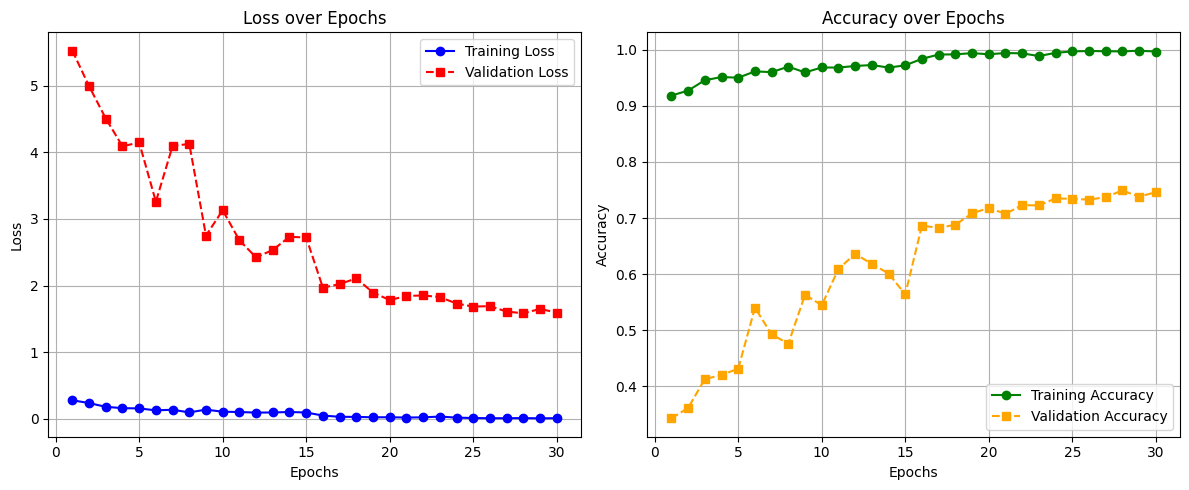

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['loss']) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], marker='o', linestyle='-', color='b', label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(epochs, history.history['val_loss'], marker='s', linestyle='--', color='r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], marker='o', linestyle='-', color='g', label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(epochs, history.history['val_accuracy'], marker='s', linestyle='--', color='orange', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

In [ ]:
import os

dataset_path = "/kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset"  # Update this


class_names = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))])


print("Extracted Class Names:", class_names)

with open("class_labels.txt", "w") as f:
    for class_name in class_names:
        f.write(class_name + "\n")

print("Class names saved to class_labels.txt")


Extracted Class Names: ['Aloevera', 'Amla', 'Amruthaballi', 'Arali', 'Astma_weed', 'Badipala', 'Balloon_Vine', 'Bamboo', 'Beans', 'Betel', 'Bhrami', 'Bringaraja', 'Caricature', 'Castor', 'Catharanthus', 'Chakte', 'Chilly', 'Citron lime (herelikai)', 'Coffee', 'Common rue(naagdalli)', 'Coriender', 'Curry', 'Doddpathre', 'Drumstick', 'Ekka', 'Eucalyptus', 'Ganigale', 'Ganike', 'Gasagase', 'Ginger', 'Globe Amarnath', 'Guava', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jackfruit', 'Jasmine', 'Kambajala', 'Kasambruga', 'Kohlrabi', 'Lantana', 'Lemon', 'Lemongrass', 'Malabar_Nut', 'Malabar_Spinach', 'Mango', 'Marigold', 'Mint', 'Neem', 'Nelavembu', 'Nerale', 'Nooni', 'Onion', 'Padri', 'Palak(Spinach)', 'Papaya', 'Parijatha', 'Pea', 'Pepper', 'Pomoegranate', 'Pumpkin', 'Raddish', 'Rose', 'Sampige', 'Sapota', 'Seethaashoka', 'Seethapala', 'Spinach1', 'Tamarind', 'Taro', 'Tecoma', 'Thumbe', 'Tomato', 'Tulsi', 'Turmeric', 'ashoka', 'camphor', 'kamakasturi', 'kepala']
Class names saved to class_lab

In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

# Load your model
model = load_model('final_final.h5')

# Print the summary of the model
model.summary()

ValueError: Unrecognized keyword arguments: ['batch_shape']